In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

%pwd

# load toy data
toy = np.load('../data/toy-data.npz')
t_data = toy['training_data']
t_labels = toy['training_labels']
w = np.array([-0.4528, -0.5190])
b = 0.1471

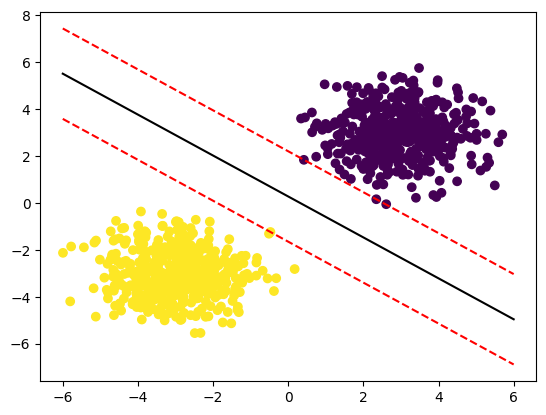

In [10]:
# plot data
plt.scatter(t_data[:, 0], t_data[:, 1], c=t_labels)

# plot the decision boundary
x = np.linspace(-6, 6, 100)
y = -(w[0] * x + b) / w[1]

plt.plot(x, y, 'k')

# plot the margin
m_pos = (1 - b - w[0]*x)/w[1]
m_neg = (-1 - b - w[0]*x)/w[1]
plt.plot(x, m_pos, 'r--')
plt.plot(x, m_neg, 'r--')


plt.show()


In [23]:
def partition_data(data, labels, validation_size=10000):
    """
    shuffle and split dataset into training and validation set without sklearn
    
    args:
        data (numpy.ndarray): input data with num_samples as the first dimension
        labels (numpy.ndarray): input labels with shape of (num_samples, 1)
        validation_size (int): number of validation examples
    
    returns:
        tuple: training data, training labels, validation data, validation labels
    """
    # number of samples
    num_samples = data.shape[0]
    
    # generate a shuffled index array
    indices = np.arange(num_samples)
    np.random.seed(42)  
    np.random.shuffle(indices)
    
    # shuffle data and labels using the shuffled indices
    shuffled_data = data[indices]
    shuffled_labels = labels[indices]
    
    # split the shuffled dataset into training and validation sets
    validation_data = shuffled_data[:validation_size]
    validation_labels = shuffled_labels[:validation_size]
    training_data = shuffled_data[validation_size:]
    training_labels = shuffled_labels[validation_size:]
    
    return training_data, training_labels, validation_data, validation_labels
def eval_accuracy(predicted_labels, true_labels):
    """
    evaluate the accuracy of the predicted labels
    
    args:
        predicted_labels (numpy.ndarray): predicted labels
        true_labels (numpy.ndarray): true labels
        
    returns:
        float: accuracy
    """
    return np.mean(predicted_labels == true_labels)

In [12]:
# load MNIST data
mnist = np.load('../data/mnist-data.npz')
mnist_train_data = mnist['training_data']
mnist_labels = mnist['training_labels']
mnist_test_data = mnist['test_data']

# partition MNIST data
mnist_X_train, mnist_y_train, mnist_X_val, mnist_y_val = partition_data(mnist_train_data, mnist_labels, validation_size=10000)
print(mnist_X_train.shape)
print(mnist_X_val.shape)
print(mnist_y_train.shape)
print(mnist_y_val.shape)

(50000, 1, 28, 28)
(10000, 1, 28, 28)
(50000,)
(10000,)


In [16]:
# load spam data
spam = np.load('../data/spam-data.npz')
spam_train_data = spam['training_data']
spam_labels = spam['training_labels']
spam_test_data = spam['test_data']

# partition spam data
spam_X_train, spam_y_train, spam_X_val, spam_y_val = partition_data(spam_train_data, spam_labels, validation_size=int(0.20*spam_train_data.shape[0]))
print(spam_X_train.shape)
print(spam_X_val.shape)
print(spam_y_train.shape)
print(spam_y_val.shape)

(3337, 32)
(834, 32)
(3337,)
(834,)


In [17]:
import sklearn.svm as svm

def prepare_training_data(data, labels, train_sizes, validation_size=10000):
    """
    Shuffle and split dataset for varying training sizes and a fixed validation set.
    
    Args:
        data (numpy.ndarray): Input data of shape (samples, 1, 28, 28).
        labels (numpy.ndarray): Labels of shape (samples,).
        train_sizes (list of int): List of training set sizes (e.g., [100, 200, 500, ...]).
        validation_size (int): Number of validation examples.
    
    Returns:
        dict: A dictionary where keys are training sizes and values are tuples:
              (training data, training labels, validation data, validation labels).
    """
    # Shuffle the dataset
    np.random.seed(42)
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    # Create validation set
    validation_data = data[:validation_size].reshape(validation_size, -1)
    validation_labels = labels[:validation_size]
    
    # Create training subsets
    results = {}
    for size in train_sizes:
        train_data = data[validation_size:validation_size + size].reshape(size, -1)
        train_labels = labels[validation_size:validation_size + size]
        results[size] = (train_data, train_labels, validation_data, validation_labels)
    
    return results


train_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

partitions = prepare_training_data(mnist_train_data, mnist_labels, train_sizes)

for size in train_sizes:
    train_data, train_labels, val_data, val_labels = partitions[size]
    print(f"Training size: {size}, Training Data Shape: {train_data.shape}, Validation Data Shape: {val_data.shape}")

Training size: 100, Training Data Shape: (100, 784), Validation Data Shape: (10000, 784)
Training size: 200, Training Data Shape: (200, 784), Validation Data Shape: (10000, 784)
Training size: 500, Training Data Shape: (500, 784), Validation Data Shape: (10000, 784)
Training size: 1000, Training Data Shape: (1000, 784), Validation Data Shape: (10000, 784)
Training size: 2000, Training Data Shape: (2000, 784), Validation Data Shape: (10000, 784)
Training size: 5000, Training Data Shape: (5000, 784), Validation Data Shape: (10000, 784)
Training size: 10000, Training Data Shape: (10000, 784), Validation Data Shape: (10000, 784)


In [ ]:
clf = svm.SVC()
clf.fit(partitions[100][0], partitions[100][1])
predictions = clf.predict(partitions[100][2])
print(eval_accuracy(predictions, partitions[100][3])

SVC()